Index(['Race', 'Year', 'Name', 'Gender', 'Age', 'Country', 'Overall',
       'Finish Time', 'Finish'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886546 entries, 0 to 886545
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Race         886546 non-null  object
 1   Year         886546 non-null  int64 
 2   Name         886546 non-null  object
 3   Gender       886546 non-null  object
 4   Age          886546 non-null  int64 
 5   Country      886546 non-null  object
 6   Overall      886546 non-null  int64 
 7   Finish Time  886546 non-null  object
 8   Finish       886546 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 60.9+ MB
Race           0
Year           0
Name           0
Gender         0
Age            0
Country        0
Overall        0
Finish Time    0
Finish         0
dtype: int64


<Figure size 1400x900 with 0 Axes>

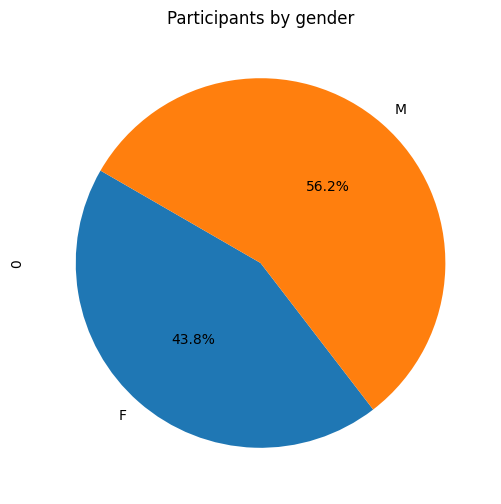

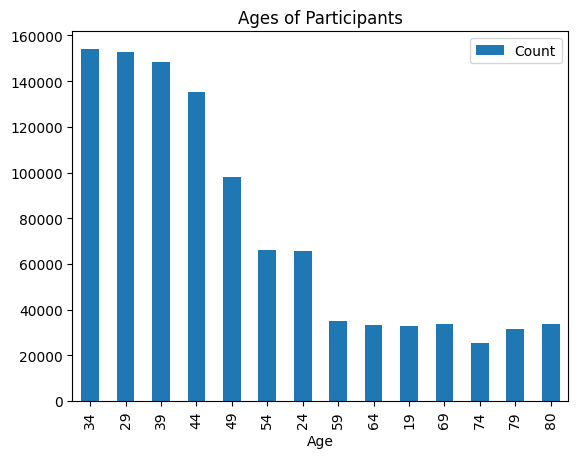

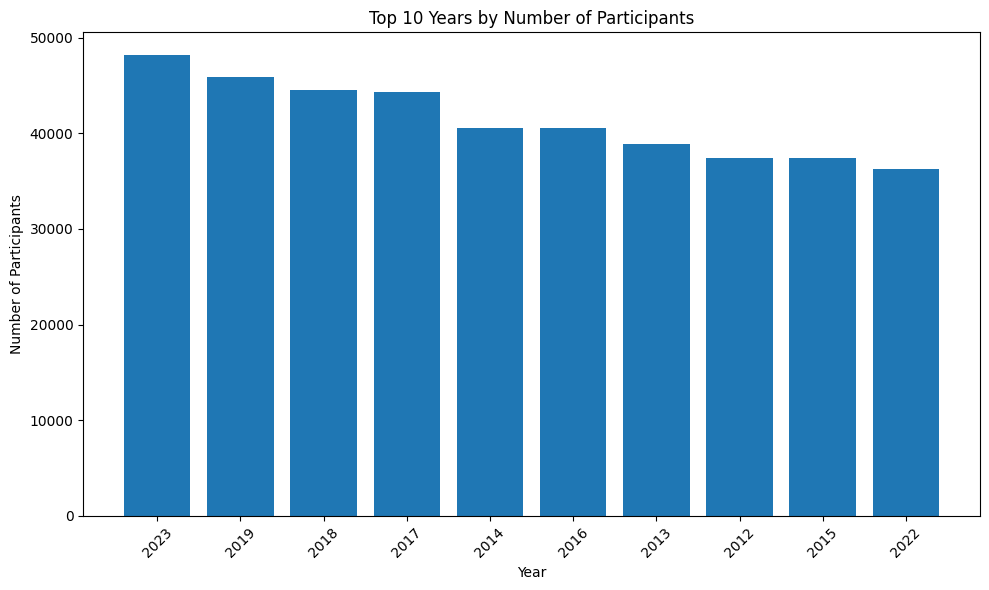

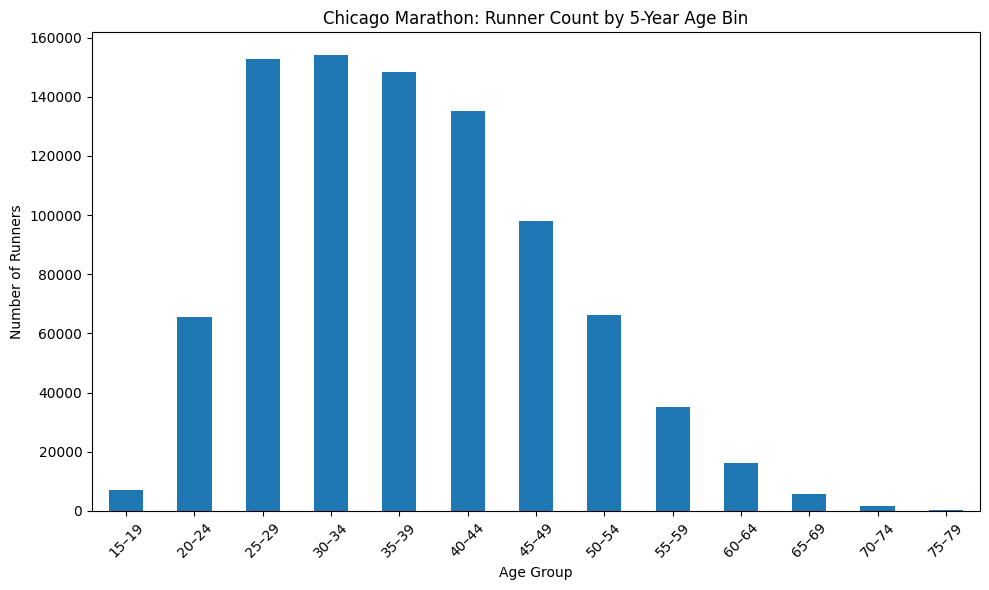

/var/folders/nz/mm1_d02n3xl6v8l03ymp94640000gn/T/ipykernel_67069/448359982.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = res.groupby('age_bin')['Finish'].mean() / 60  # to minutes


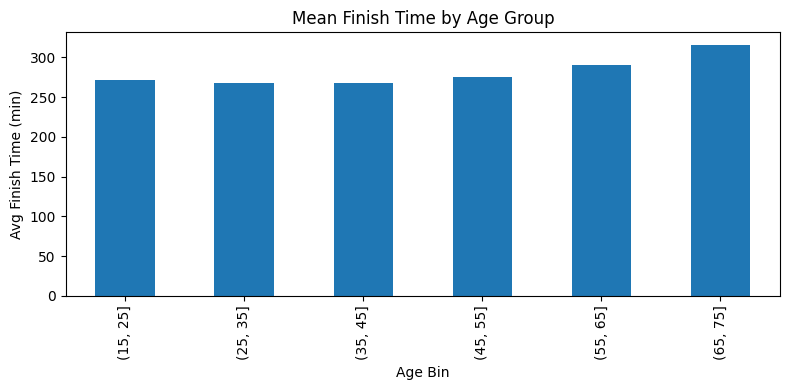

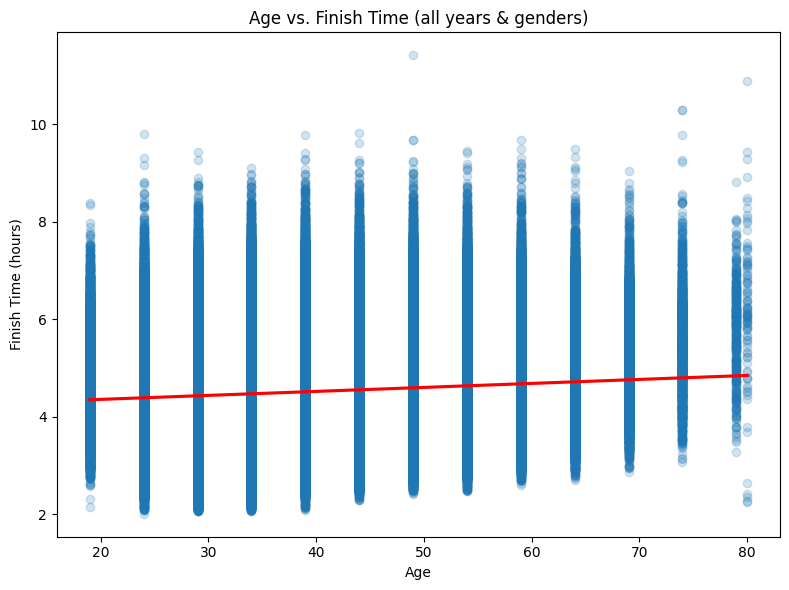

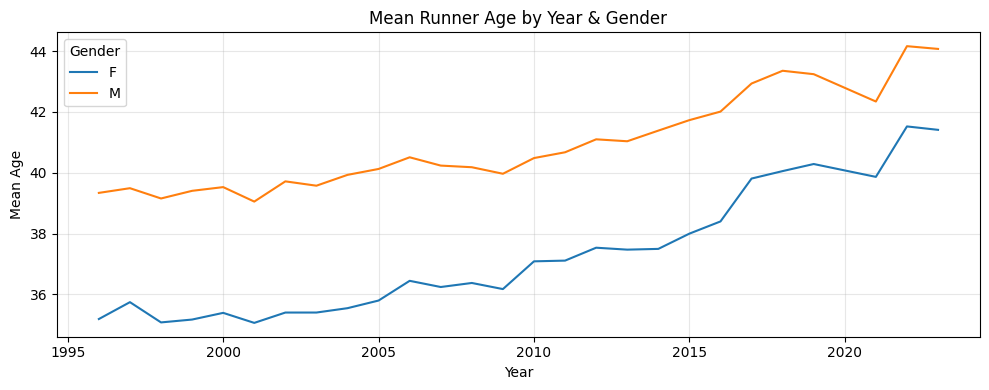

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and clean data
res = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_res.csv')
weather = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_weather.csv')

print(res.columns)
res['Name'] = res['Name'].fillna('Unknown')
res.info()
print(res.isna().sum())

#Explore the data
plt.figure(figsize=(14,9))
df2=res.groupby(['Gender']).agg({'Gender': ['count']})
df2.plot(kind='pie',
         figsize = (15,6),
         autopct= '%1.1f%%',
         startangle = 150,
         label = True,
         pctdistance = 0.55,
         legend=0, subplots=True, xlabel=0, ylabel=0)
plt.title('Participants by gender')

# Data percentage year wise
year_count= res.Year.value_counts()
year_count = year_count.reset_index()
year_count.columns=['Year', 'Count']
year_count = year_count.sort_values(by='Year')
year_count.plot.bar(x='Year')
plt.title('Year-wise Frequency of Participants')
#plt.show()
age_categories= res[res.Age>0]
age_categories['Age'].value_counts().plot.bar()
plt.title('Ages of Participants')
plt.show()

# Compute the number of participants per Year
counts = res.groupby('Year').size().sort_values(ascending=False).head(10)

# Plot the top 10 years by number of participants
plt.figure(figsize=(10, 6))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Top 10 Years by Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1. Define 5-year bins from, say, age 15 up to 84
bins   = list(range(15, 85, 5))  # [15,20,25,…,80]
labels = [f"{b}–{b+4}" for b in bins[:-1]]

# 2. Cut into bins and count
res['age_bin'] = pd.cut(res['Age'], bins=bins, labels=labels, right=False, include_lowest=True)
age_counts = res['age_bin'].value_counts().sort_index()

# 3. Plot the distribution
plt.figure(figsize=(10,6))
age_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Runners')
plt.title('Chicago Marathon: Runner Count by 5-Year Age Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create 10-year age bins
res['age_bin'] = pd.cut(res['Age'], bins=range(15, 80, 10))
grp = res.groupby('age_bin')['Finish'].mean() / 60  # to minutes

plt.figure(figsize=(8,4))
grp.plot(kind='bar')
plt.xlabel('Age Bin')
plt.ylabel('Avg Finish Time (min)')
plt.title('Mean Finish Time by Age Group')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(
    x='Age',
    y=res['Finish']/3600,
    data=res,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'red'}
)
plt.xlabel('Age')
plt.ylabel('Finish Time (hours)')
plt.title('Age vs. Finish Time (all years & genders)')
plt.tight_layout()
plt.show()

mean_age = res.groupby(['Year','Gender'])['Age'].mean().unstack()
mean_age.plot(figsize=(10,4))
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.title('Mean Runner Age by Year & Gender')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.840e+06, tolerance: 4.440e+03
  model = cd_fast.enet_coordinate_descent(


Model   MAE(sec)   RMSE(sec)   R²
OLS         305.3       334.8   0.910
Ridge       201.1       252.8   0.949
Lasso       213.0       258.1   0.947
RF          286.3       430.7   0.851

5-fold CV RMSE (OLS): 700.0 sec ± 216.3 sec

Ridge CV RMSE: 767.4 ± 310.2 sec
Lasso CV RMSE: 771.1 ± 300.6 sec
Best α: {'alpha': 0.001} CV RMSE: 764.175787146673
Forecasted average finish times (with covariate forecasts):

  Female:
    2024: 17867 sec → 04:57:46
    2025: 17914 sec → 04:58:33
    2026: 17961 sec → 04:59:21
    2027: 18008 sec → 05:00:08
    2028: 18055 sec → 05:00:55
    2029: 18102 sec → 05:01:42
    2030: 18150 sec → 05:02:29
    2031: 18197 sec → 05:03:16
    2032: 18244 sec → 05:04:03
    2033: 18291 sec → 05:04:50

  Male:
    2024: 15959 sec → 04:25:59
    2025: 15989 sec → 04:26:29
    2026: 16019 sec → 04:26:59
    2027: 16049 sec → 04:27:29
    2028: 16079 sec → 04:27:59
    2029: 16109 sec → 04:28:29
    2030: 16139 sec → 04:28:59
    2031: 16169 sec → 04:29:29
    2032: 161

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+06, tolerance: 4.368e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.841e+06, tolerance: 4.849e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

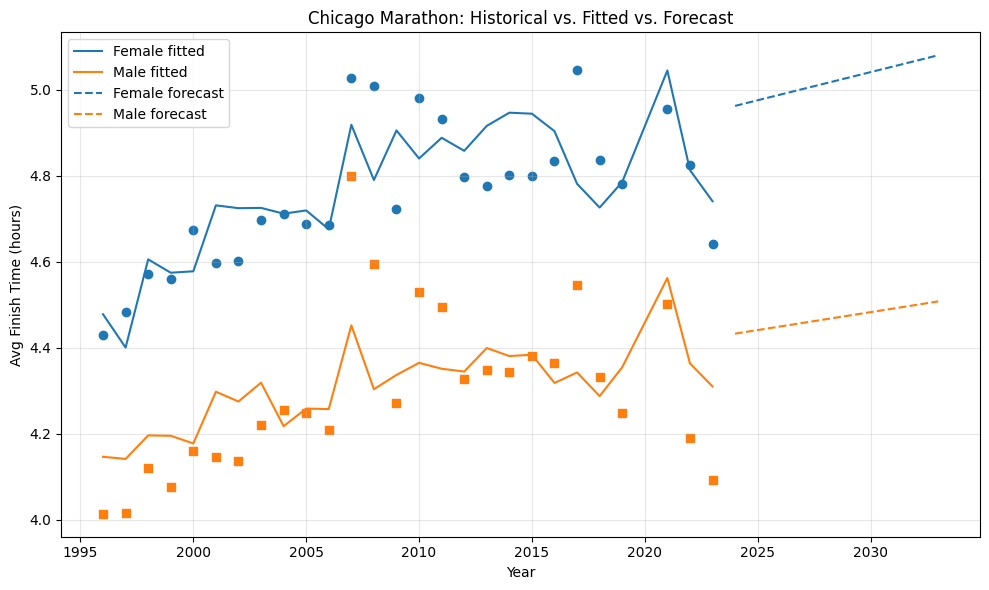

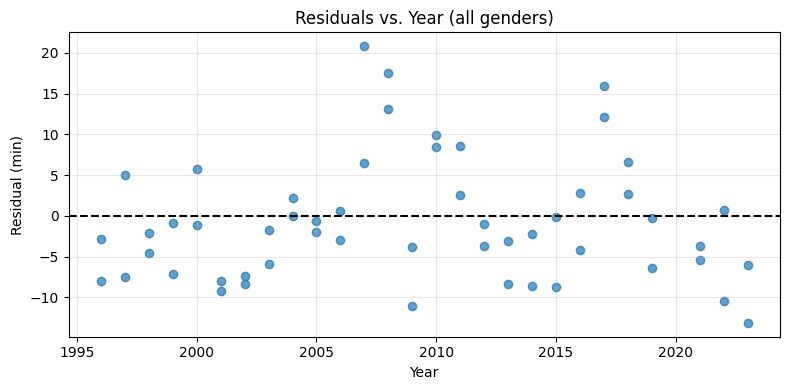


LIME explanation (feature contributions in seconds):
0.00 < male <= 1.00: +135754.928
0.00 < Year_x_male <= 2010.50: -88701.791
2003.00 < Year <= 2009.00: -3389.277
39.41 < avg_age <= 40.86: +1268.332
9.86 < sd_age <= 10.59: -585.035
17304.00 < n_finishers <= 20234.50: +79.041


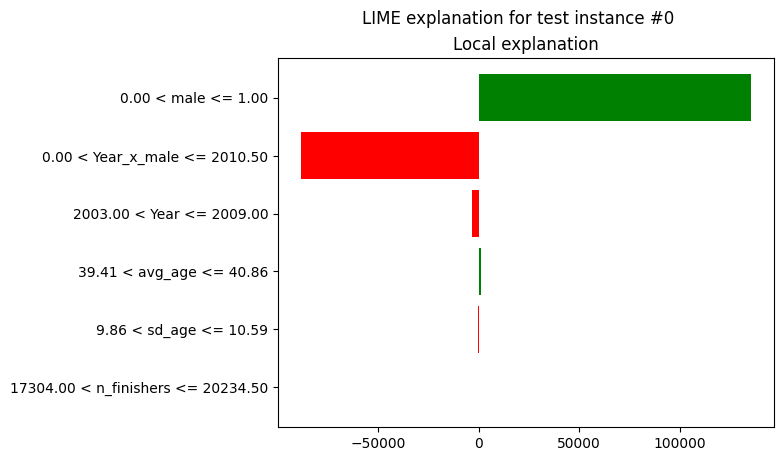

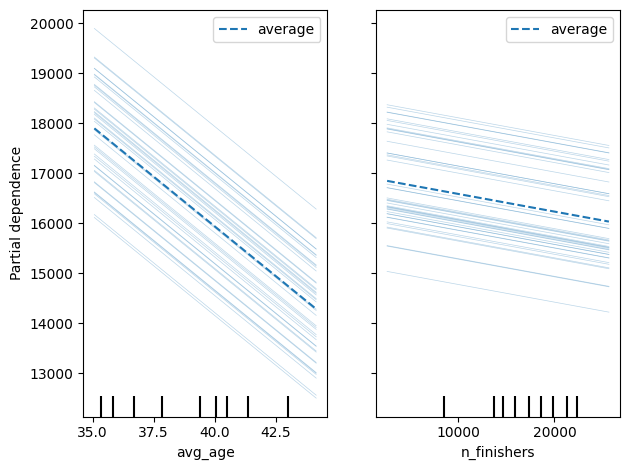

In [55]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import GridSearchCV

# --- 1. Load and preprocess ---
res = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_res.csv')

def time_to_sec(t):
    h, m, s = map(int, t.split(':'))
    return h*3600 + m*60 + s

res['finish_sec'] = res['Finish Time'].apply(time_to_sec)
res = res[res['Gender'].isin(['M','F'])]

# --- 2. Compute aggregated features per (Year, Gender) ---
grp = res.groupby(['Year','Gender'])
df = grp['finish_sec'].mean().rename('avg_finish_sec').to_frame()
df['n_finishers'] = grp.size()
df['avg_age']     = grp['Age'].mean()
df['sd_age']      = grp['Age'].std()

year_gender = df.reset_index()

# --- 3. Encode & assemble feature matrix ---
year_gender['male'] = (year_gender['Gender']=='M').astype(int)
year_gender['Year_x_male'] = year_gender['Year'] * year_gender['male']

features = [
    'Year','male','Year_x_male',
    'n_finishers','avg_age','sd_age'
]
X = year_gender[features].values
y = year_gender['avg_finish_sec'].values

# --- 4. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 5. Compare multiple regressors ---
models = {
    'OLS'  : LinearRegression(),
    'Ridge': Ridge(alpha=0.001),
    'Lasso': Lasso(alpha=0.1),
    'RF'   : RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred_i = mdl.predict(X_test)
    mae_i  = mean_absolute_error(y_test, y_pred_i)
    rmse_i = np.sqrt(mean_squared_error(y_test, y_pred_i))
    r2_i   = r2_score(y_test, y_pred_i)
    results[name] = (mae_i, rmse_i, r2_i)
    if name == 'OLS':
        # store in-sample OLS fits for later plotting
        year_gender['pred_sec'] = mdl.predict(year_gender[features].values)

# print comparison
print("Model   MAE(sec)   RMSE(sec)   R²")
for name, (mae_i, rmse_i, r2_i) in results.items():
    print(f"{name:6} {mae_i:10.1f} {rmse_i:11.1f} {r2_i:7.3f}")

# use OLS for forecasting & interpretation
model = models['OLS']

# --- 6. 5-fold CV on chosen model (optional) ---
neg_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-neg_mse)
print(f"\n5-fold CV RMSE (OLS): {cv_rmse.mean():.1f} sec ± {cv_rmse.std():.1f} sec\n")
print("Ridge (α=0.001) on hold-out:")
print(f"  MAE : {mae_r:.1f} sec ({mae_r/60:.2f} min)")
print(f"  RMSE: {rmse_r:.1f} sec ({rmse_r/60:.2f} min)")
print(f"  R²  : {r2_r:.3f}")

# --- 7. Forecast covariates and next 10 years (2026–2035) ---
last_year = year_gender['Year'].max()
future_years = np.arange(last_year+1, last_year+11)

def lin_forecast(index, values, future_idx):
    X_ts = index.values.reshape(-1,1)
    y_ts = values.values
    lr = LinearRegression().fit(X_ts, y_ts)
    return lr.predict(future_idx.reshape(-1,1))

cov_feats = ['n_finishers','avg_age','sd_age']
cov_forecasts = {'F':{}, 'M':{}}

for gender in ['F','M']:
    sub = year_gender[year_gender['Gender']==gender].set_index('Year')
    for feat in cov_feats:
        cov_forecasts[gender][feat] = lin_forecast(
            sub.index, sub[feat], future_years
        )

preds = {}
for gender_label, male_val in [('F',0), ('M',1)]:
    df_future = pd.DataFrame({
        'Year':        future_years,
        'male':        male_val,
        'Year_x_male': future_years * male_val,
        **{feat: cov_forecasts[gender_label][feat] for feat in cov_feats}
    })
    Xf = df_future[features].values
    preds[gender_label] = model.predict(Xf)

# --- 8. Print forecasted average times ---
def sec_to_hms(sec):
    td = timedelta(seconds=int(sec))
    tot = int(td.total_seconds())
    h = tot//3600
    m = (tot%3600)//60
    s = tot%60
    return f"{h:02d}:{m:02d}:{s:02d}"

print("Forecasted average finish times (with covariate forecasts):")
for gender_label in ['F','M']:
    print(f"\n  {'Female' if gender_label=='F' else 'Male'}:")
    for yr, sec in zip(future_years, preds[gender_label]):
        print(f"    {yr}: {sec:.0f} sec → {sec_to_hms(sec)}")

# --- 9. Plot in hours & annotate times ---
plt.figure(figsize=(10, 6))
for gender_label, male_val, color, marker in [
    ('Female', 0, 'tab:blue', 'o'),
    ('Male',   1, 'tab:orange', 's'),
]:
    mask = year_gender['male'] == male_val
    yrs    = year_gender.loc[mask, 'Year']
    secs   = year_gender.loc[mask, 'avg_finish_sec']
    fitted = year_gender.loc[mask, 'pred_sec']
    for x, sec in zip(yrs, secs):
        plt.scatter(x, sec/3600, color=color, marker=marker)
    plt.plot(yrs, fitted/3600, color=color, linestyle='-', label=f"{gender_label} fitted")
for gender_label, (color, ls) in {'F':('tab:blue','--'),'M':('tab:orange','--')}.items():
    plt.plot(future_years, preds[gender_label]/3600, color=color, linestyle=ls,
             label=f"{'Female' if gender_label=='F' else 'Male'} forecast")
plt.xlabel('Year')
plt.ylabel('Avg Finish Time (hours)')
plt.title('Chicago Marathon: Historical vs. Fitted vs. Forecast')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 10. Plot residuals vs Year ---
resids = year_gender['avg_finish_sec'] - year_gender['pred_sec']
plt.figure(figsize=(8,4))
plt.scatter(year_gender['Year'], resids/60, alpha=0.7)
plt.axhline(0, color='k', ls='--')
plt.xlabel('Year'); plt.ylabel('Residual (min)')
plt.title('Residuals vs. Year (all genders)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 11. LIME explanation for one test instance ---
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=features,
    mode='regression'
)
i = 0
instance = X_test[i]
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict,
    num_features=len(features)
)
print("\nLIME explanation (feature contributions in seconds):")
for feat, weight in exp.as_list():
    print(f"{feat:>15}: {weight:+.3f}")
fig = exp.as_pyplot_figure(); fig.suptitle(f"LIME explanation for test instance #{i}")
plt.show()

# --- 12. Partial Dependence Plots (optional) ---
PartialDependenceDisplay.from_estimator(
    model, X_train, ['avg_age','n_finishers'],
    feature_names=features, kind='both', subsample=50
)
plt.tight_layout()
plt.show()


stuff


crap

Regression metrics on test set:
  MAE : 305.3 sec (5.09 min)
  RMSE: 334.8 sec (5.58 min)
  R²  : 0.910

5-fold CV RMSE: 700.0 sec ± 216.3 sec

Forecasted average finish times (with covariate forecasts):

  Female:
    2024: 17867 sec → 04:57:46
    2025: 17914 sec → 04:58:33
    2026: 17961 sec → 04:59:21
    2027: 18008 sec → 05:00:08
    2028: 18055 sec → 05:00:55
    2029: 18102 sec → 05:01:42
    2030: 18150 sec → 05:02:29
    2031: 18197 sec → 05:03:16
    2032: 18244 sec → 05:04:03
    2033: 18291 sec → 05:04:50

  Male:
    2024: 15959 sec → 04:25:59
    2025: 15989 sec → 04:26:29
    2026: 16019 sec → 04:26:59
    2027: 16049 sec → 04:27:29
    2028: 16079 sec → 04:27:59
    2029: 16109 sec → 04:28:29
    2030: 16139 sec → 04:28:59
    2031: 16169 sec → 04:29:29
    2032: 16199 sec → 04:29:59
    2033: 16229 sec → 04:30:29


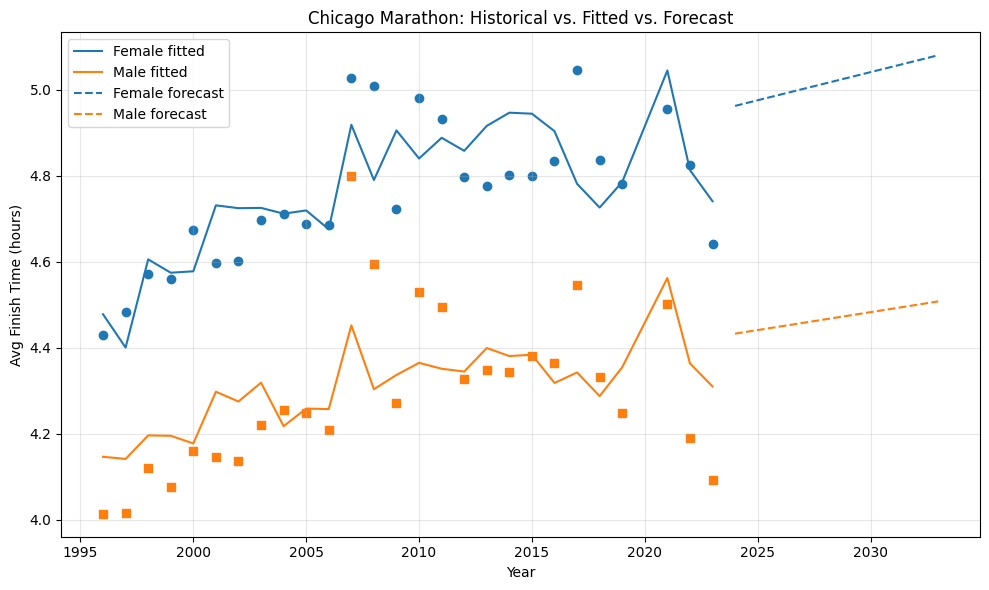

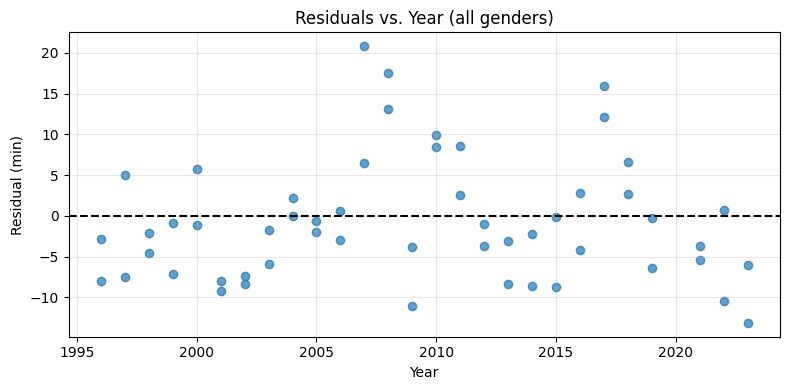

0.00 < male <= 1.00: +134424.678
0.00 < Year_x_male <= 2010.50: -87564.531
9.86 < sd_age <= 10.59: -3515.514
17304.00 < n_finishers <= 20234.50: +3110.128
39.41 < avg_age <= 40.86: -2116.872
2003.00 < Year <= 2009.00: -504.079


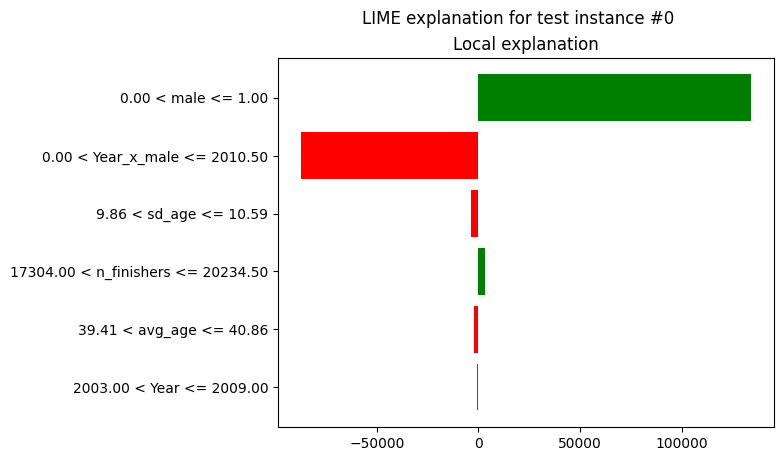

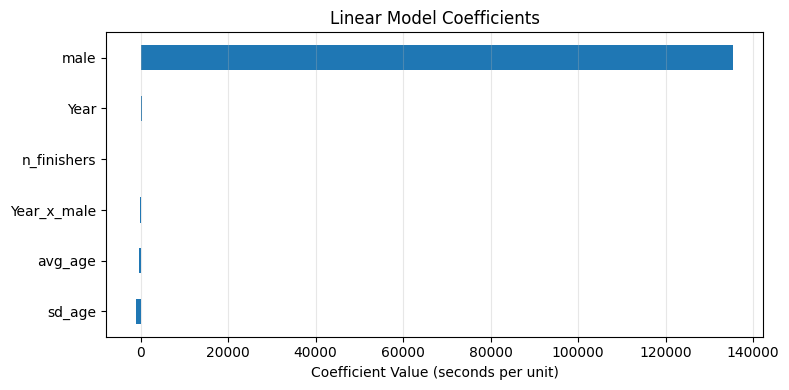

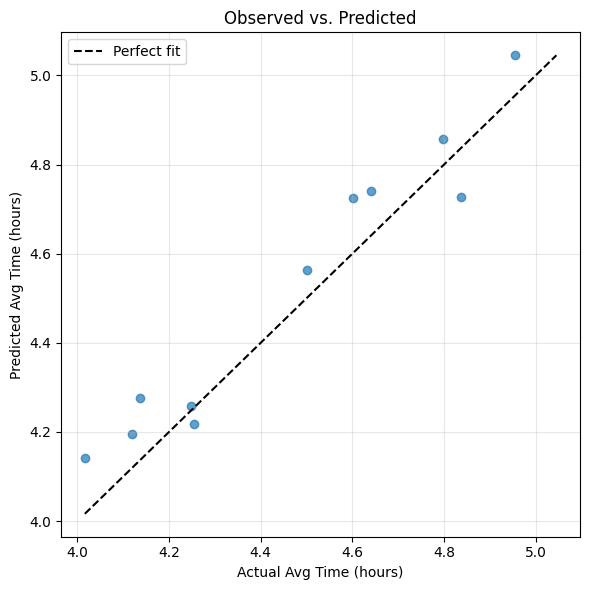

In [56]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

from lime.lime_tabular import LimeTabularExplainer

# --- 1. Load and preprocess ---
res = pd.read_csv('/Users/megantrapanese/Dropbox/MARATHON_DATA/data/Chicago/chic_res.csv')

def time_to_sec(t):
    h, m, s = map(int, t.split(':'))
    return h*3600 + m*60 + s

res['finish_sec'] = res['Finish Time'].apply(time_to_sec)
res = res[res['Gender'].isin(['M','F'])]

# --- 2. Compute aggregated features per (Year, Gender) ---
grp = res.groupby(['Year','Gender'])
df = grp['finish_sec'].mean().rename('avg_finish_sec').to_frame()
df['n_finishers'] = grp.size()
df['avg_age']     = grp['Age'].mean()
df['sd_age']      = grp['Age'].std()

year_gender = df.reset_index()

# --- 3. Encode & assemble feature matrix ---
year_gender['male'] = (year_gender['Gender']=='M').astype(int)
year_gender['Year_x_male'] = year_gender['Year'] * year_gender['male']

features = [
    'Year','male','Year_x_male',
    'n_finishers','avg_age','sd_age'
]
X = year_gender[features].values
y = year_gender['avg_finish_sec'].values

# --- 4. Train/test split & fit ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

# --- 5. Evaluate on test set ---
y_pred = model.predict(X_test)
year_gender['pred_sec'] = model.predict(year_gender[features].values)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("Regression metrics on test set:")
print(f"  MAE : {mae:.1f} sec ({mae/60:.2f} min)")
print(f"  RMSE: {rmse:.1f} sec ({rmse/60:.2f} min)")
print(f"  R²  : {r2:.3f}\n")

# --- 6. 5-fold CV (optional) ---
neg_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-neg_mse)
print(f"5-fold CV RMSE: {cv_rmse.mean():.1f} sec ± {cv_rmse.std():.1f} sec\n")

# --- 7. Forecast covariates and next 10 years (2026–2035) ---
last_year = year_gender['Year'].max()
future_years = np.arange(last_year+1, last_year+11)

# helper to linearly forecast a series
def lin_forecast(index, values, future_idx):
    X_ts = index.values.reshape(-1,1)
    y_ts = values.values
    lr = LinearRegression().fit(X_ts, y_ts)
    return lr.predict(future_idx.reshape(-1,1))

cov_feats = ['n_finishers','avg_age','sd_age']
cov_forecasts = {'F':{}, 'M':{}}

# forecast each covariate per gender
for gender in ['F','M']:
    sub = year_gender[year_gender['Gender']==gender].set_index('Year')
    for feat in cov_feats:
        cov_forecasts[gender][feat] = lin_forecast(
            sub.index, sub[feat], future_years
        )

# build future feature frames & predict
preds = {}
for gender_label, male_val in [('F',0), ('M',1)]:
    df_future = pd.DataFrame({
        'Year':        future_years,
        'male':        male_val,
        'Year_x_male': future_years * male_val,
        **{feat: cov_forecasts[gender_label][feat] for feat in cov_feats}
    })
    Xf = df_future[features].values
    preds[gender_label] = model.predict(Xf)

# --- 8. Print forecasted average times ---
def sec_to_hms(sec):
    td = timedelta(seconds=int(sec))
    tot = int(td.total_seconds())
    h = tot//3600
    m = (tot%3600)//60
    s = tot%60
    return f"{h:02d}:{m:02d}:{s:02d}"

print("Forecasted average finish times (with covariate forecasts):")
for gender_label in ['F','M']:
    print(f"\n  {'Female' if gender_label=='F' else 'Male'}:")
    for yr, sec in zip(future_years, preds[gender_label]):
        print(f"    {yr}: {sec:.0f} sec → {sec_to_hms(sec)}")

# --- 10. Plot in hours & annotate times ---

plt.figure(figsize=(10, 6))

# 1) Historical actual vs. fitted
for gender_label, male_val, color, marker in [
    ('Female', 0, 'tab:blue', 'o'),
    ('Male',   1, 'tab:orange', 's'),
]:
    mask = year_gender['male'] == male_val
    yrs    = year_gender.loc[mask, 'Year']
    secs   = year_gender.loc[mask, 'avg_finish_sec']
    fitted = year_gender.loc[mask, 'pred_sec']

    # scatter + annotate
    for x, sec in zip(yrs, secs):
        y_hr = sec / 3600
        plt.scatter(x, y_hr, color=color, marker=marker)

    # fitted line in hours
    plt.plot(yrs, fitted/3600,
             color=color, linestyle='-',
             label=f"{gender_label} fitted")

# 2) Future forecast (dashed)
forecast_styles = {'F':('tab:blue','--'), 'M':('tab:orange','--')}
for gender_label, (color, ls) in forecast_styles.items():
    hrs = preds[gender_label] / 3600
    plt.plot(future_years, hrs,
             color=color, linestyle=ls,
             label=f"{'Female' if gender_label=='F' else 'Male'} forecast")

plt.xlabel('Year')
plt.ylabel('Avg Finish Time (hours)')
plt.title('Chicago Marathon: Historical vs. Fitted vs. Forecast')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Plot residuals vs. Year
resids = year_gender['avg_finish_sec'] - year_gender['pred_sec']
plt.figure(figsize=(8,4))
plt.scatter(year_gender['Year'], resids/60, alpha=0.7)
plt.axhline(0, color='k', linestyle='--')
plt.title("Residuals vs. Year (all genders)")
plt.xlabel('Year')
plt.ylabel('Residual (min)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Prepare the explainer on your training data:
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=features,
    mode='regression'
)

# 3. Pick an instance to explain (e.g. first test sample):
i = 0
instance = X_test[i]

# 4. Generate a local explanation:
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict,
    num_features=len(features)
)

# 5. View the explanation as a list of (feature, weight):
for feat, weight in exp.as_list():
    print(f"{feat:>15}: {weight:+.3f}")

# 6. Or render it as a matplotlib figure:
fig = exp.as_pyplot_figure()
fig.suptitle(f"LIME explanation for test instance #{i}")
plt.show()

coefs = pd.Series(model.coef_, index=features)
plt.figure(figsize=(8,4))
coefs.sort_values().plot(kind='barh')
plt.xlabel('Coefficient Value (seconds per unit)')
plt.title('Linear Model Coefficients')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test/3600, y_pred/3600, alpha=0.7)
lims = [min(y_test.min(), y_pred.min())/3600, max(y_test.max(), y_pred.max())/3600]
plt.plot(lims, lims, 'k--', label='Perfect fit')
plt.xlabel('Actual Avg Time (hours)')
plt.ylabel('Predicted Avg Time (hours)')
plt.title('Observed vs. Predicted')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Neural Network Stuff


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

Training neural network...
Epoch 1/500
3/3 [==============================] - 2s 189ms/step - loss: 267010832.0000 - mae: 16313.6396 - root_mean_squared_error: 16340.4658 - val_loss: 273962720.0000 - val_mae: 16503.5234 - val_root_mean_squared_error: 16551.8184 - lr: 0.0010
Epoch 2/500
3/3 [==============================] - 0s 31ms/step - loss: 267009264.0000 - mae: 16313.6172 - root_mean_squared_error: 16340.4180 - val_loss: 273962688.0000 - val_mae: 16503.5273 - val_root_mean_squared_error: 16551.8184 - lr: 0.0010
Epoch 3/500
3/3 [==============================] - 0s 30ms/step - loss: 267007760.0000 - mae: 16313.5918 - root_mean_squared_error: 16340.3721 - val_loss: 273961952.0000 - val_mae: 16503.5098 - val_root_mean_squared_error: 16551.7969 - lr: 0.0010
Epoch 4/500
3/3 [==============================] - 0s 33ms/step - loss: 267005888

/var/folders/nz/mm1_d02n3xl6v8l03ymp94640000gn/T/ipykernel_67069/3145553822.py:122: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_cv_model,



CV Results (RMSE): [16001.16148719 16765.12858076 16019.40237807 16810.76749646
 16250.94665256]
Mean CV RMSE: 16369.5 ± 353.1 seconds
1/1 [==============================] - 0s 21ms/step

Forecasted Average Finish Times:

  Female:
    2024: 372 sec → 00:06:11
    2025: 358 sec → 00:05:58
    2026: 343 sec → 00:05:42
    2027: 327 sec → 00:05:26
    2028: 310 sec → 00:05:10
    2029: 292 sec → 00:04:51
    2030: 275 sec → 00:04:34
    2031: 259 sec → 00:04:18
    2032: 241 sec → 00:04:00
    2033: 224 sec → 00:03:43

  Male:
    2024: -44 sec → -1:59:16
    2025: -46 sec → -1:59:14
    2026: -48 sec → -1:59:12
    2027: -50 sec → -1:59:10
    2028: -52 sec → -1:59:08
    2029: -53 sec → -1:59:07
    2030: -55 sec → -1:59:06
    2031: -56 sec → -1:59:05
    2032: -57 sec → -1:59:03
    2033: -59 sec → -1:59:02
1/1 [==============================] - 0s 20ms/step


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.1s finished


1/1 [==============================] - 0s 20ms/step


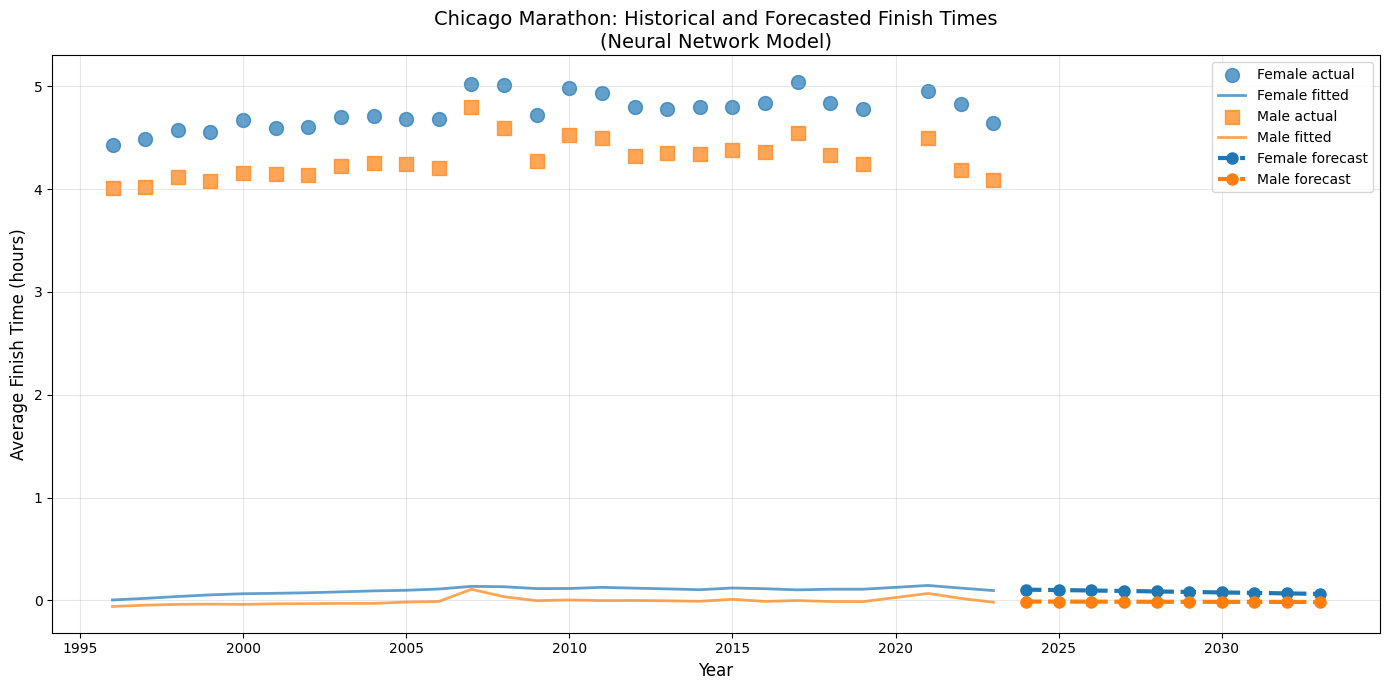


Generating LIME explanations...
157/157 [==============================] - 0s 1ms/step

Test Sample #1
Actual: 297.3 min, Predicted: 8.7 min
Feature contributions:
           Year: +156.030
    n_finishers: -115.517
           male: -85.286
         sd_age: -49.477
    Year_x_male: -28.923
        avg_age: +20.229


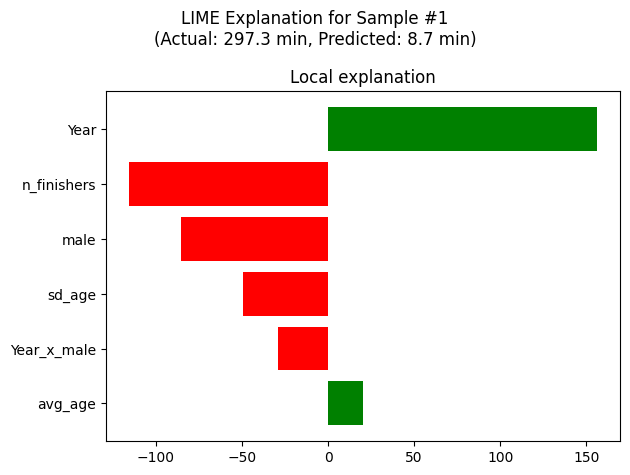

157/157 [==============================] - 0s 939us/step

Test Sample #2
Actual: 254.9 min, Predicted: -1.0 min
Feature contributions:
           Year: +172.274
    n_finishers: -120.294
           male: -85.213
         sd_age: -48.351
    Year_x_male: -29.821
        avg_age: +19.590


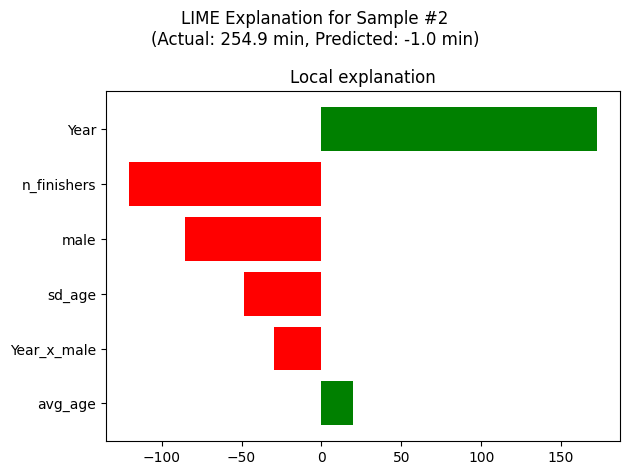

157/157 [==============================] - 0s 940us/step

Test Sample #3
Actual: 255.3 min, Predicted: -1.8 min
Feature contributions:
           Year: +170.205
    n_finishers: -117.870
           male: -90.325
         sd_age: -48.163
    Year_x_male: -29.848
        avg_age: +24.226


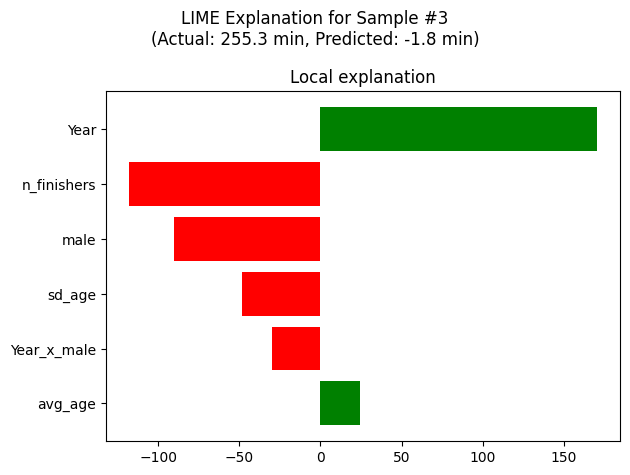


Calculating feature importance...
1/1 [==============================] - 0s 46ms/step

Feature Importance (Permutation):
    feature  importance_mean  importance_std
Year_x_male        44.264574       16.069417
       male        23.481900       10.689998
    avg_age        12.241776        8.929302
n_finishers        -0.511542       11.397172
     sd_age        -2.601970        7.829481
       Year        -8.739202       14.910406


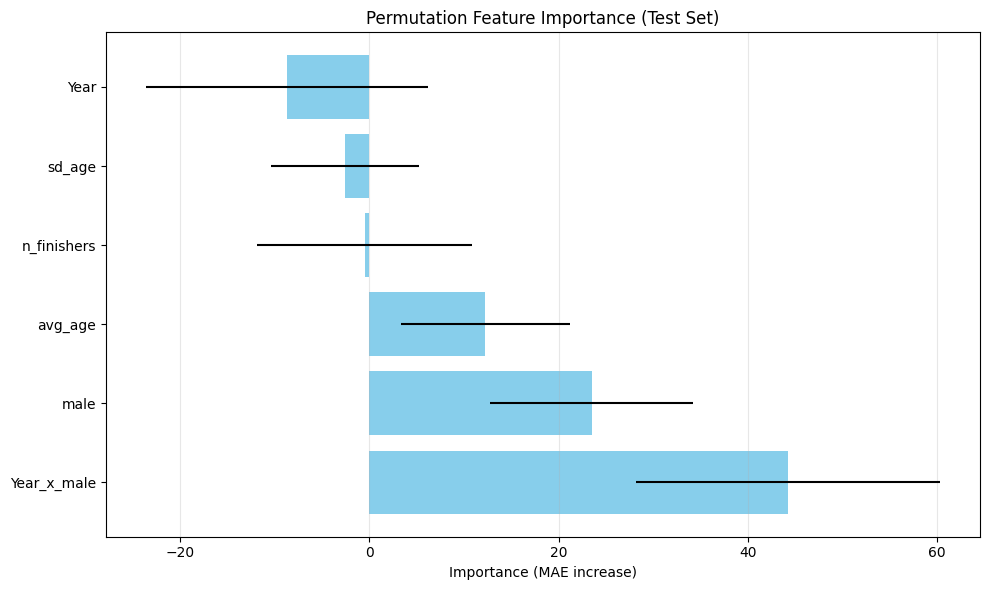

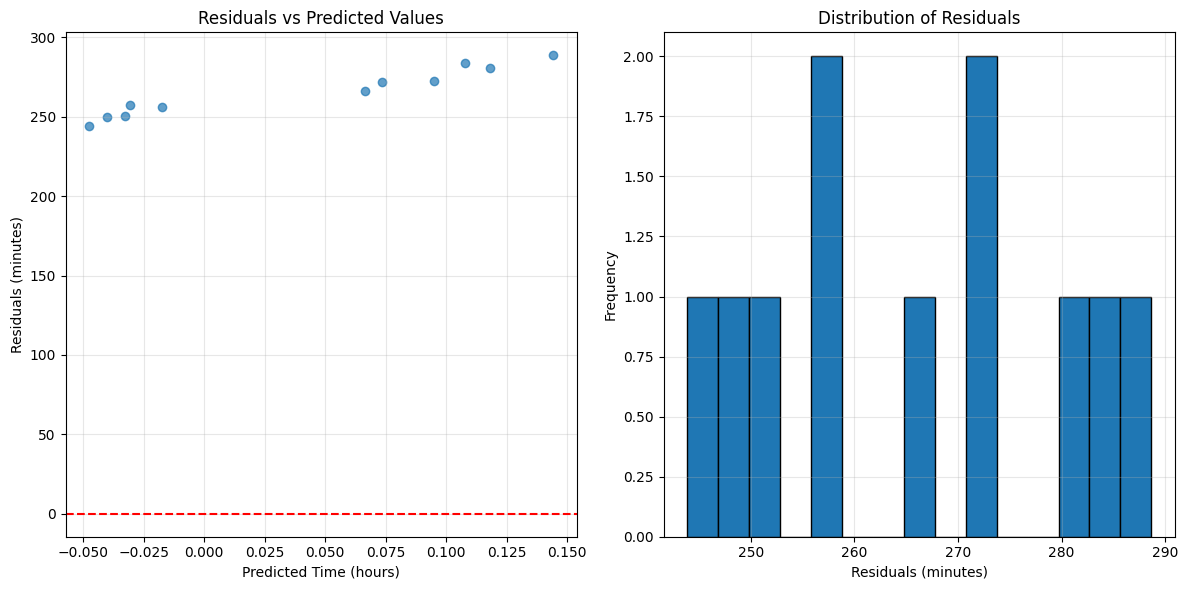

2/2 [==============================] - 0s 4ms/step

Analysis complete. Model and results saved.
